**__TP2__**

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn

__Decision tree__

In [4]:
import sys
sys.path

['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug',
 '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev',
 '/Users/thibaultchausson/Documents/UTBM/2ème année ingénieur/Printemps/DS54/TP',
 '/Users/thibaultchausson/Documents/UTBM/2ème année ingénieur/Printemps/DS54/TP',
 '/Library/Frameworks/Python.framework/Versions/3.10/lib/python310.zip',
 '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10',
 '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/lib-dynload',
 '',
 '/Users/thibaultchausson/Documents/UTBM/2ème année ingénieur/Printemps/DS54/TP/venv/lib/python3.10/site-packages']

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

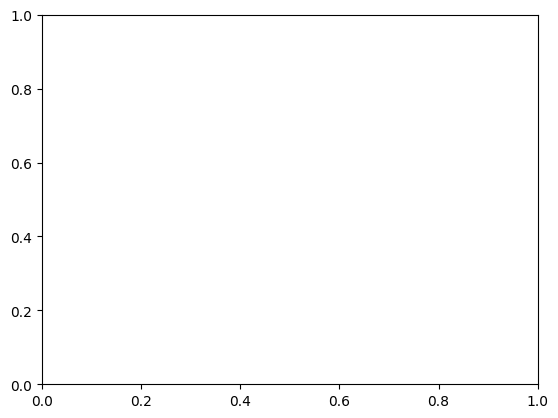

In [5]:
mglearn.plots.plot_animal_tree()

Building decision trees

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

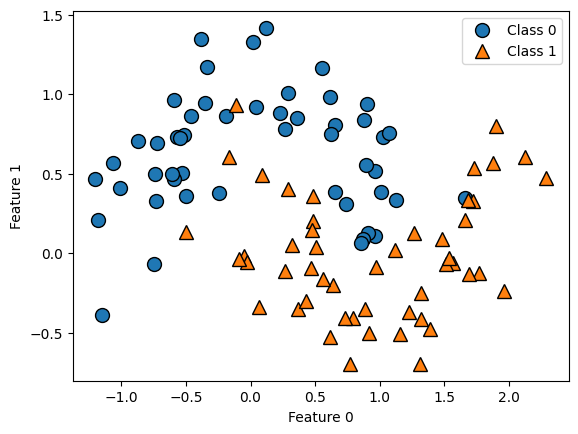

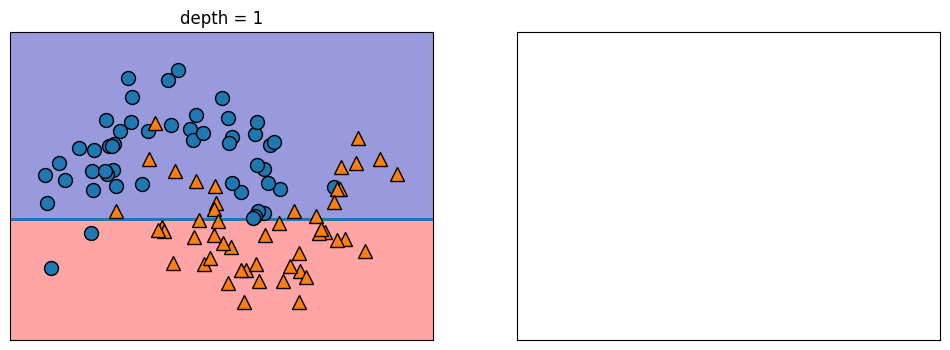

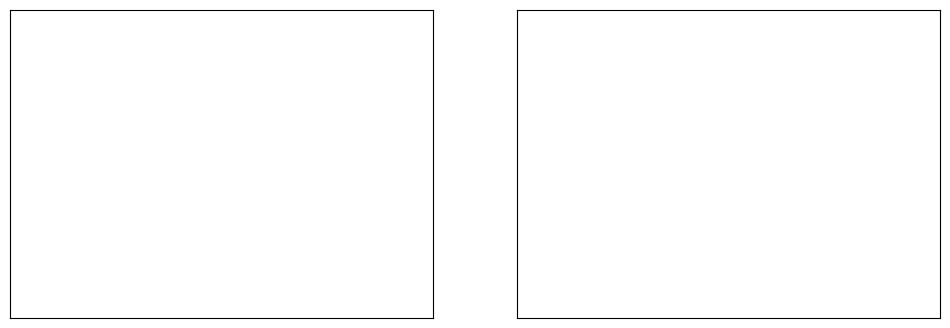

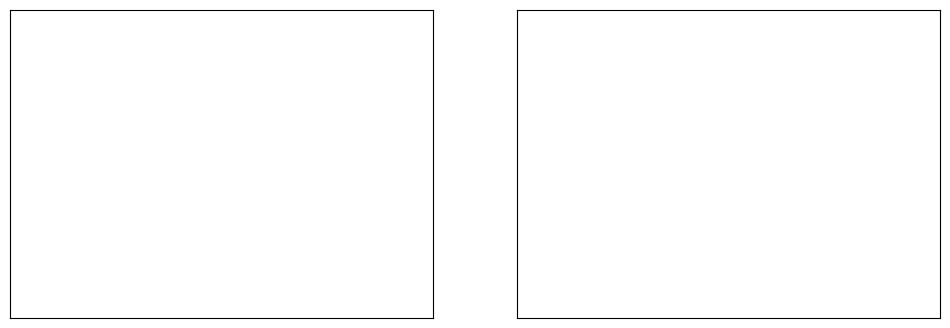

In [6]:
mglearn.plots.plot_tree_progressive()

Controlling complexity of decision trees

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


Analyzing Decision Trees

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [9]:
import graphviz

with open("./tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

Feature importance in trees

In [10]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


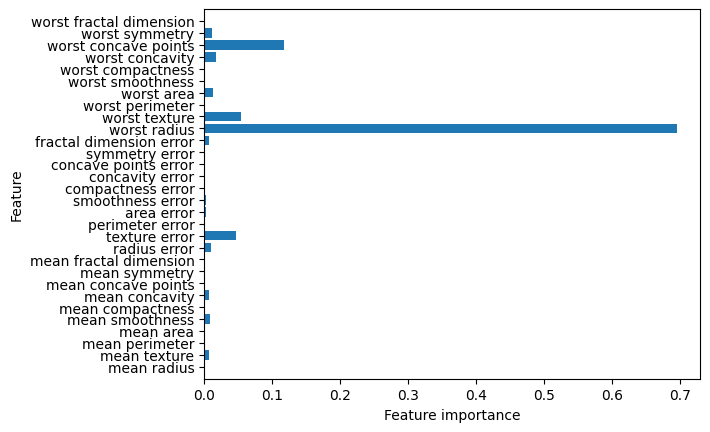

In [11]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

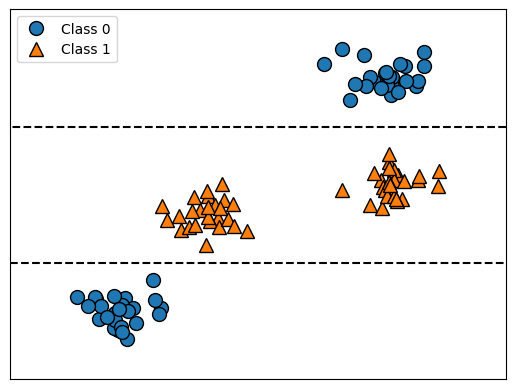

In [12]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

__Exercice 1__

https://inria.github.io/scikit-learn-mooc/python_scripts/trees_dataset.html
https://github.com/INRIA/scikit-learn-mooc/blob/main/datasets/penguins_classification.csv

1) Load the data set using pandas and display the first few rows of the data frame.

In [13]:
penguins = pd.read_csv("./penguins_classification.csv")

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"] #data
target_column = "Species" #target

penguins.head()

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie


2) Split the data into a training (80%) and a testing set (20%).

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(penguins[culmen_columns], penguins[target_column], test_size=0.2, random_state=2)

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

3) Use the `plot_tree` function from `sklearn.tree` to plot the decision tree.

[Text(0.4, 0.9375, 'Culmen Length (mm) <= 42.35\ngini = 0.642\nsamples = 273\nvalue = [120, 60, 93]\nclass = Adelie'),
 Text(0.26666666666666666, 0.8125, 'Culmen Depth (mm) <= 15.1\ngini = 0.051\nsamples = 114\nvalue = [111, 0, 3]\nclass = Adelie'),
 Text(0.2, 0.6875, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Gentoo'),
 Text(0.3333333333333333, 0.6875, 'gini = 0.0\nsamples = 111\nvalue = [111, 0, 0]\nclass = Adelie'),
 Text(0.5333333333333333, 0.8125, 'Culmen Depth (mm) <= 16.35\ngini = 0.534\nsamples = 159\nvalue = [9, 60, 90]\nclass = Gentoo'),
 Text(0.4666666666666667, 0.6875, 'gini = 0.0\nsamples = 84\nvalue = [0, 0, 84]\nclass = Gentoo'),
 Text(0.6, 0.6875, 'Culmen Length (mm) <= 46.05\ngini = 0.339\nsamples = 75\nvalue = [9, 60, 6]\nclass = Chinstrap'),
 Text(0.3333333333333333, 0.5625, 'Culmen Depth (mm) <= 18.3\ngini = 0.526\nsamples = 23\nvalue = [9, 13, 1]\nclass = Chinstrap'),
 Text(0.13333333333333333, 0.4375, 'Culmen Depth (mm) <= 16.5\ngini = 0.272\nsamples = 1

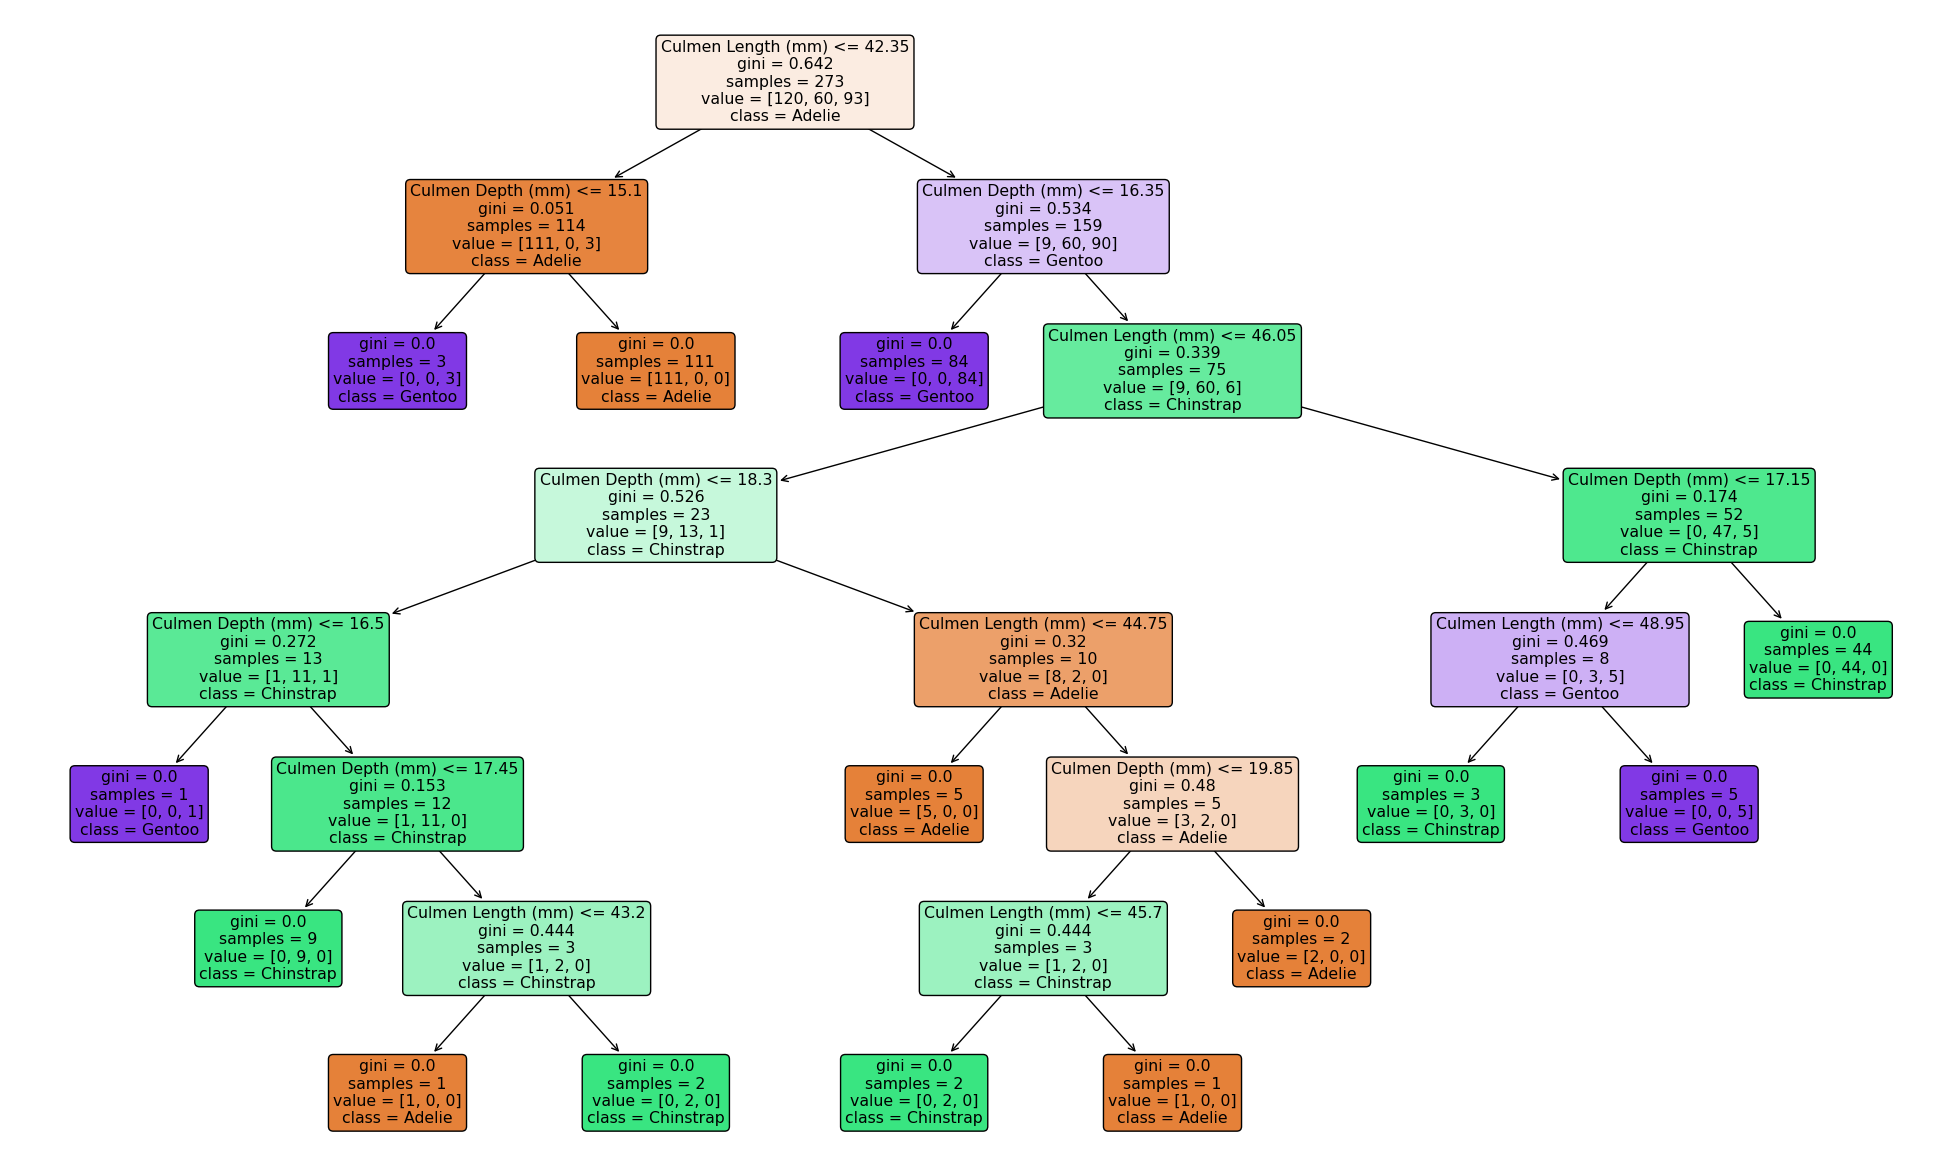

In [16]:
#plot two level decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 15))
plot_tree(tree, filled=True, rounded=True, class_names=["Adelie", "Chinstrap", "Gentoo"], feature_names=culmen_columns)

4) Use the `score` method of the decision tree to compute the accuracy on the training and testing data.

In [17]:
tree.score(X_test, y_test)

0.927536231884058

__Exercice 2__

Using the iris dataset, make a decision tree and Knn model (5 neighbours) (80% training, 20% testing) and compare their effectiveness using cross validation.

In [18]:
#Decision tree
from sklearn.datasets import load_iris

iris = load_iris()
X_trainIris, X_testIris, y_trainIris, y_testIris = train_test_split(iris.data, iris.target, test_size=0.2, random_state=2)

0.9333333333333333

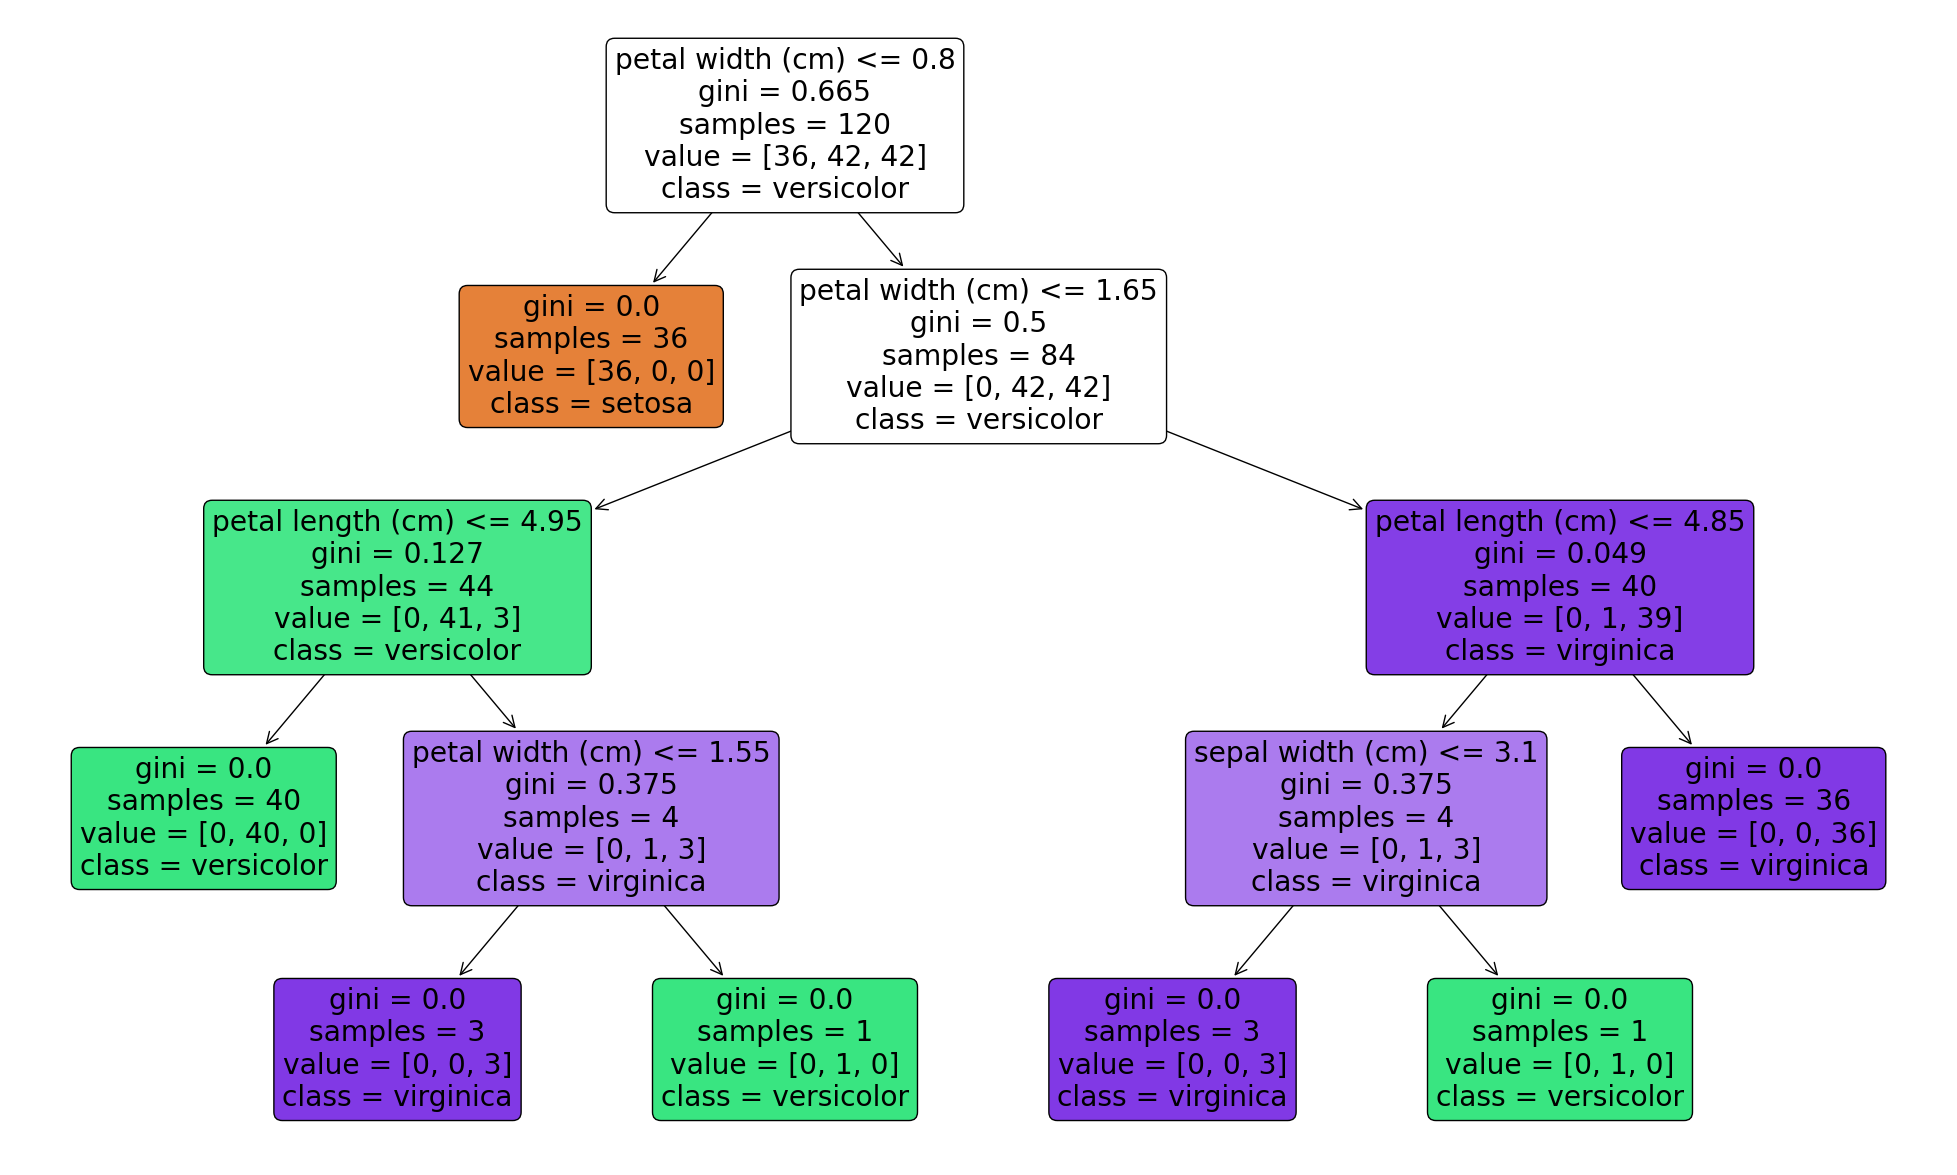

In [19]:
treeIris = DecisionTreeClassifier(random_state=0)
treeIris.fit(X_trainIris, y_trainIris)

plt.figure(figsize=(25, 15))
plot_tree(treeIris, filled=True, rounded=True, class_names=iris.target_names, feature_names=iris.feature_names)

treeIris.score(X_testIris, y_testIris)

In [20]:
#Knn
from sklearn.neighbors import KNeighborsClassifier

knnIris = KNeighborsClassifier(n_neighbors=5)
knnIris.fit(X_trainIris, y_trainIris)

knnIris.score(X_testIris, y_testIris)

/Users/thibaultchausson/Documents/UTBM/2ème année ingénieur/Printemps/DS54/TP/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [21]:
#Cross validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(treeIris, iris.data, iris.target, cv=10)

print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]


**__Random Forest__**

__Exercice 1__

Using the iris dataset, make a random forest of 5 trees with a maximum depth of 3, then visualise each tree with its accuracy.

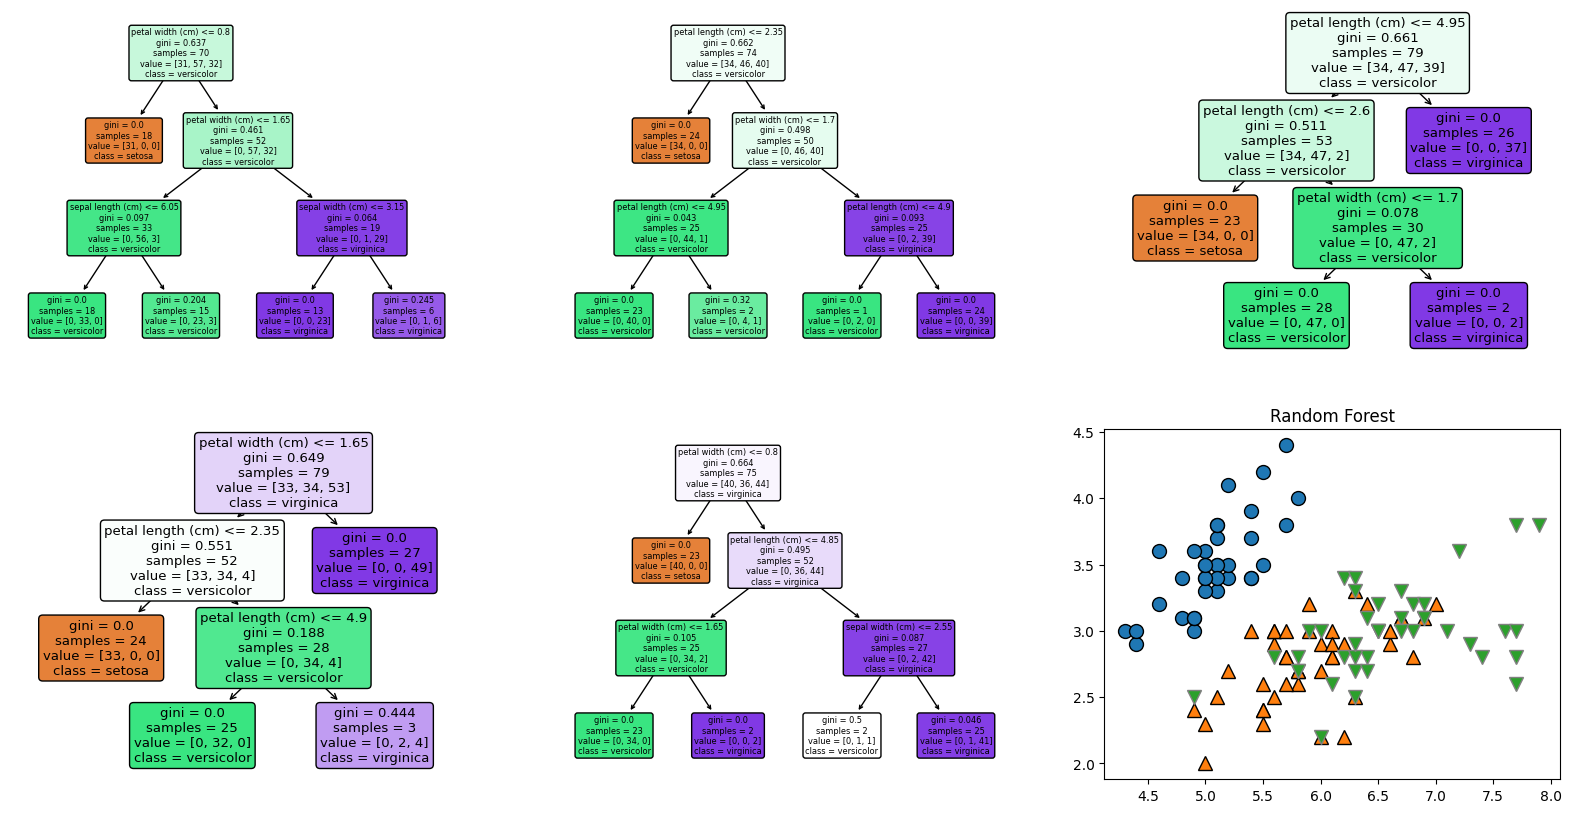

In [22]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, max_depth=3, random_state=2)

forest.fit(X_trainIris, y_trainIris)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    #mglearn.plots.plot_tree_partition(X_trainIris, y_trainIris, tree, ax=ax)
    plot_tree(tree, ax=ax, filled=True, rounded=True, class_names=iris.target_names, feature_names=iris.feature_names)

#mglearn.plots.plot_2d_separator(forest, X_trainIris, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_trainIris[:, 0], X_trainIris[:, 1], y_trainIris)

In [23]:
forest.score(X_testIris, y_testIris)

0.9666666666666667

**__6) Logistic Regression__**

__Exercice 1__

Creat an even more regularized model by setting C as 0,01.

/Users/thibaultchausson/Documents/UTBM/2ème année ingénieur/Printemps/DS54/TP/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/thibaultchausson/Documents/UTBM/2ème année ingénieur/Printemps/DS54/TP/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer 

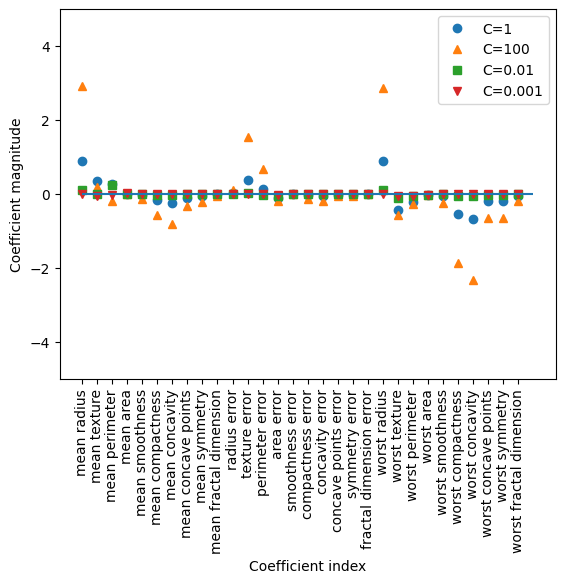

In [24]:
#Coefficients Learned by Logistic Regression on the Breast Cancer Dataset for diffe rent values of C

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.svm import LinearSVC

cancer = load_breast_cancer()

X_trainCancer, X_testCancer, y_trainCancer, y_testCancer = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)

logreg = LogisticRegression().fit(X_trainCancer, y_trainCancer)
logreg100 = LogisticRegression(C=100).fit(X_trainCancer, y_trainCancer)
logreg001 = LogisticRegression(C=0.001).fit(X_trainCancer, y_trainCancer)
logreg01 = LogisticRegression(C=0.01).fit(X_trainCancer, y_trainCancer)


plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg01.coef_.T, 's', label="C=0.01")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


/Users/thibaultchausson/Documents/UTBM/2ème année ingénieur/Printemps/DS54/TP/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


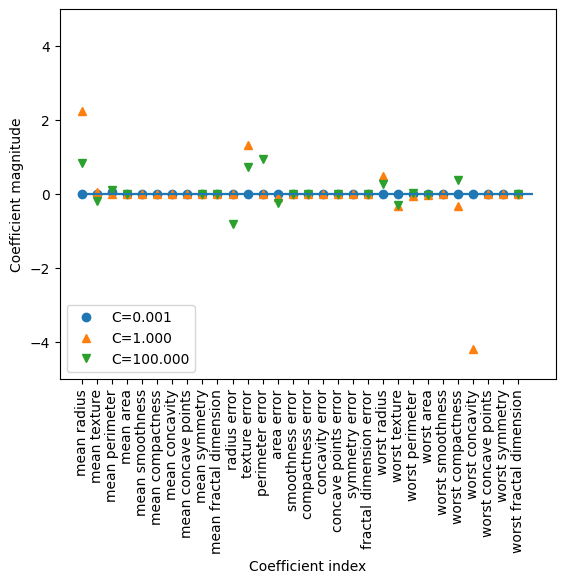

In [26]:
#Coefficients Learn by Logistic regression with L1 penalty on the Breast Cancer dataset for different values of C

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver="liblinear").fit(X_trainCancer, y_trainCancer)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_trainCancer, y_trainCancer)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_testCancer, y_testCancer)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
    plt.hlines(0, 0, cancer.data.shape[1])
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.ylim(-5, 5)
    plt.legend(loc=3)

What are the results? How do you interpret them?

C'est plus efficace avec la régularisation L1 car elle permet de réduire le nombre de features utilisées.
De plus, on peut voir que le C=1 est le moins efficace, par rapport à C=100 ou C =0,001.

__Exercice 2__

Use logistic regression on the iris dataset.

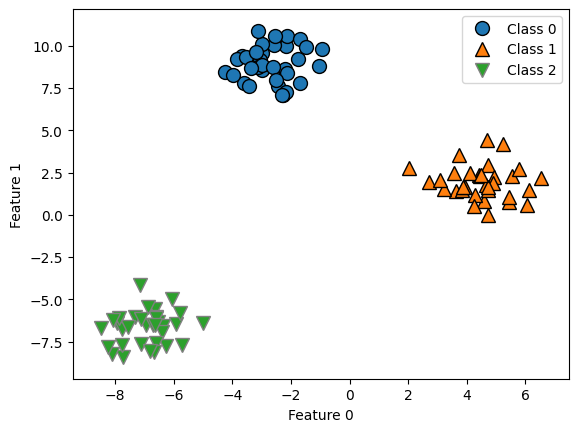

In [27]:
#Two dimensional toy dataset containing three classes

from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [28]:
#We train a LinearSVC classifier on the dataset
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


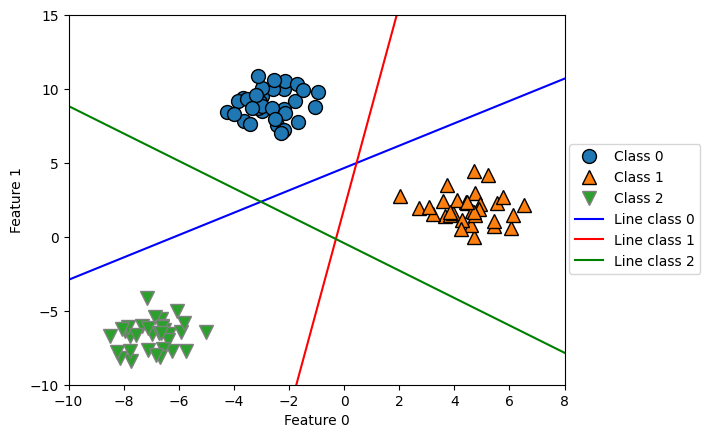

In [29]:
#Decision boundaries Learned by the three one-vs-rest classifiers

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
    plt.plot(line, -(line*coef[0]+ intercept)/coef[1], c = color)
plt.ylim(-10, 15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01,0.3))

Text(0, 0.5, 'Feature 1')

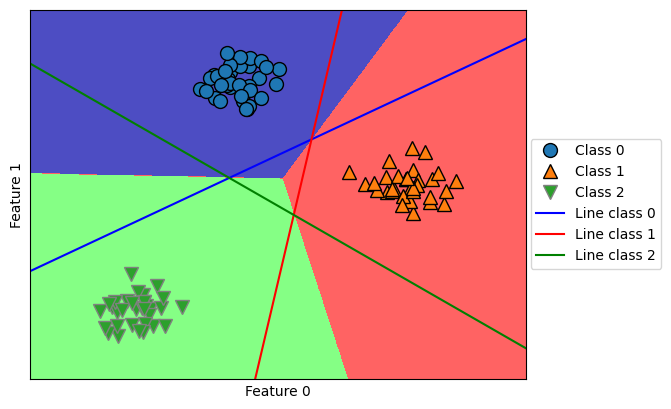

In [30]:
#Multiclass decision boundaries from the three one-vs-one classifiers

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
    plt.plot(line, -(line*coef[0]+ intercept)/coef[1], c = color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01,0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")